# Entanglement

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

ket = Statevector(qc)

ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [3]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [4]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [5]:
qc.x(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [6]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],\n            dims=(2, 2))'

## Second cirtuit

In [7]:
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [8]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

# Measuring a Qubit

## X Measurement

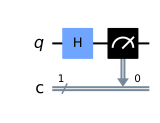

In [9]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw()

## Z Measurement

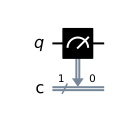

In [11]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw()

## Sample Measurements

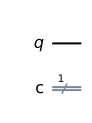

In [14]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

qc = QuantumCircuit(1,1)
qc.draw()

In [15]:
print('Results from z measurement:', 
     backend.run(qc.compose(meas_z)).result().get_counts())

Results from z measurement: {'0': 1024}


In [16]:
print('Results from x measurement:', 
     backend.run(qc.compose(meas_x)).result().get_counts())

Results from x measurement: {'1': 529, '0': 495}


## experiments with the |1> state

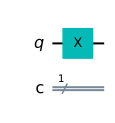

In [18]:
qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw()

In [19]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Result from ' + basis + ' measurement: ',
         backend.run(qc.compose(circ)).result().get_counts())

Result from z measurement:  {'1': 1024}
Result from x measurement:  {'0': 517, '1': 507}


## plus state

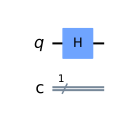

In [20]:
qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

In [21]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Result from ' + basis + ' measurement: ',
         backend.run(qc.compose(circ)).result().get_counts())

Result from z measurement:  {'0': 506, '1': 518}
Result from x measurement:  {'0': 1024}


## other states, with rotation

In [24]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0)

In [25]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Result from ' + basis + ' measurement: ',
         backend.run(qc.compose(circ)).result().get_counts())

Result from z measurement:  {'1': 146, '0': 878}
Result from x measurement:  {'0': 150, '1': 874}
